In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
df = pd.read_csv(r"E:\Dheeraj\Finlatics Python\Project\global_youtube_statistics.csv", encoding = "latin1")

In [31]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [32]:
print(df.head())

   rank                    Youtuber  subscribers   video views  \
0     1                    T-Series  245000000.0  2.280000e+11   
1     2              YouTube Movies  170000000.0  0.000000e+00   
2     3                     MrBeast  166000000.0  2.836884e+10   
3     4  Cocomelon - Nursery Rhymes  162000000.0  1.640000e+11   
4     5                   SET India  159000000.0  1.480000e+11   

           category                       Title  uploads Country of origin  \
0             Music                    T-Series    20082             India   
1  Film & Animation               youtubemovies        1     United States   
2     Entertainment                     MrBeast      741     United States   
3         Education  Cocomelon - Nursery Rhymes      966     United States   
4             Shows                   SET India   116536             India   

         Country Abbreviation   channel_type  video_views_rank  country_rank  \
0          india           IN          Music          

In [33]:
print(df.tail())

      rank              Youtuber  subscribers   video views          category  \
1001   779              The Dodo   14200000.0  9.964117e+09    Pets & Animals   
1002   787      Supercar Blondie   14100000.0  5.405563e+09  Autos & Vehicles   
1003   871  Just For Laughs Gags   13300000.0  7.406629e+09            Comedy   
1004   872      Kabita's Kitchen   13300000.0  2.831276e+09     Howto & Style   
1005   873            BanderitaX   13300000.0  4.129249e+09            Gaming   

                     Title  uploads     Country of origin  \
1001     Dorukhan Gï¿½ï¿½ï        8                   NaN   
1002      Supercar Blondie      855  United Arab Emirates   
1003  Just For Laughs Gags     6916         United States   
1004      Kabita's Kitchen     1489                 India   
1005            BanderitaX     1640          Saudi Arabia   

                   Country Abbreviation channel_type  video_views_rank  \
1001                   NaN          NaN          NaN         4050736.0  

In [34]:
print(df.shape)
print(df.columns)

(1006, 29)
Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country of origin', 'Country', 'Abbreviation',
       'channel_type', 'video_views_rank', 'country_rank', 'channel_type_rank',
       'video_views_for_the_last_30_days', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'subscribers_for_last_30_days',
       'created_year', 'created_month', 'created_date',
       'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'],
      dtype='object')


In [35]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006 entries, 0 to 1005
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     1006 non-null   int64  
 1   Youtuber                                 1006 non-null   object 
 2   subscribers                              1003 non-null   float64
 3   video views                              1006 non-null   float64
 4   category                                 951 non-null    object 
 5   Title                                    1006 non-null   object 
 6   uploads                                  1006 non-null   int64  
 7   Country of origin                        881 non-null    object 
 8   Country                                  881 non-null    object 
 9   Abbreviation                             881 non-null    object 
 10  channel_type                             974 non

In [36]:
print(df.isnull().sum())

rank                                         0
Youtuber                                     0
subscribers                                  3
video views                                  0
category                                    55
Title                                        0
uploads                                      0
Country of origin                          125
Country                                    125
Abbreviation                               125
channel_type                                32
video_views_rank                             1
country_rank                               119
channel_type_rank                           35
video_views_for_the_last_30_days            57
lowest_monthly_earnings                      0
highest_monthly_earnings                     0
lowest_yearly_earnings                       0
highest_yearly_earnings                      0
subscribers_for_last_30_days               340
created_year                                 5
created_month

In [37]:
df.dropna(subset = ["subscribers"], inplace = True)
df["category"] = df["category"].fillna(df["category"].mode()[0])
df["Country of origin"] = df["Country of origin"].fillna(df["Country of origin"].mode()[0])
df["Country"] = df["Country"].fillna(df["Country"].mode()[0])
df["Abbreviation"] = df["Abbreviation"].fillna(df["Abbreviation"].mode()[0])
df["channel_type"] = df["channel_type"].fillna(df["channel_type"].mode()[0])
df.dropna(subset = ["video_views_rank"], inplace = True)
df["country_rank"] = df["country_rank"].fillna(df["country_rank"].median())
df["channel_type_rank"] = df["channel_type_rank"].fillna(df["channel_type_rank"].median())
df["video_views_for_the_last_30_days"] = df["video_views_for_the_last_30_days"].fillna(df["video_views_for_the_last_30_days"].median())
df["subscribers_for_last_30_days"] = df["subscribers_for_last_30_days"].fillna(df["subscribers_for_last_30_days"].mean())
df.dropna(subset = ["created_year"], inplace = True)
df["created_month"] = df["created_month"].fillna(df["created_month"].mode()[0])
df.dropna(subset = ["created_date"], inplace = True)
df["Gross tertiary education enrollment (%)"] = df["Gross tertiary education enrollment (%)"].fillna(df["Gross tertiary education enrollment (%)"].mean())
df["Population"] = df["Population"].fillna(df["Population"].median())
df["Unemployment rate"] = df["Unemployment rate"].fillna(df["Unemployment rate"].mean())
df["Urban_population"] = df["Urban_population"].fillna(df["Urban_population"].median())
df["Latitude"] = df["Latitude"].fillna(df["Latitude"].median())
df["Longitude"] = df["Longitude"].fillna(df["Longitude"].median())
print(df.isnull().sum())

rank                                       0
Youtuber                                   0
subscribers                                0
video views                                0
category                                   0
Title                                      0
uploads                                    0
Country of origin                          0
Country                                    0
Abbreviation                               0
channel_type                               0
video_views_rank                           0
country_rank                               0
channel_type_rank                          0
video_views_for_the_last_30_days           0
lowest_monthly_earnings                    0
highest_monthly_earnings                   0
lowest_yearly_earnings                     0
highest_yearly_earnings                    0
subscribers_for_last_30_days               0
created_year                               0
created_month                              0
created_da

In [38]:
df.rename(columns = {"rank" : "Rank"}, inplace = True)
df.rename(columns = {"subscribers" : "Subscribers"}, inplace = True)
df.rename(columns = {"video views" : "Video Views"}, inplace = True)
df.rename(columns = {"category" : "Category"}, inplace = True)
df.rename(columns = {"uploads" : "Uploads"}, inplace = True)
df.rename(columns = {"Country of origin" : "Country of Origin"}, inplace = True)
df.rename(columns = {"channel_type" : "Channel_Type"}, inplace = True)
df.rename(columns = {"video_views_rank" : "Video_Views_Rank"}, inplace = True)
df.rename(columns = {"country_rank" : "Country_Rank"}, inplace = True)
df.rename(columns = {"channel_type_rank" : "Channel_Type_Rank"}, inplace = True)
df.rename(columns = {"video_views_for_the_last_30_days" : "Video_Views_for_the_last_30_Days"}, inplace = True)
df.rename(columns = {"lowest_monthly_earnings" : "Lowest_Monthly_Earnings"}, inplace = True)
df.rename(columns = {"highest_monthly_earnings" : "Highest_Monthly_Earnings"}, inplace = True)
df.rename(columns = {"lowest_yearly_earnings" : "Lowest_Yearly_Earnings"}, inplace = True)
df.rename(columns = {"highest_yearly_earnings" : "Highest_Yearly_Earnings"}, inplace = True)
df.rename(columns = {"subscribers_for_last_30_days" : "Subscribers_for_the_last_30_Days"}, inplace = True)
df.rename(columns = {"created_year" : "Created_Year"}, inplace = True)
df.rename(columns = {"created_month" : "Created_Month"}, inplace = True)
df.rename(columns = {"created_date" : "Created_Date"}, inplace = True)
df.rename(columns = {"Gross tertiary education enrollment (%)" : "Gross Tertiary Education Enrollment (%)"}, inplace = True)
df.rename(columns = {"Unemployment rate" : "Unemployment Rate"}, inplace = True)
df.rename(columns = {"Urban_population" : "Urban_Population"}, inplace = True)
print(df.shape)
print(df.columns)

(998, 29)
Index(['Rank', 'Youtuber', 'Subscribers', 'Video Views', 'Category', 'Title',
       'Uploads', 'Country of Origin', 'Country', 'Abbreviation',
       'Channel_Type', 'Video_Views_Rank', 'Country_Rank', 'Channel_Type_Rank',
       'Video_Views_for_the_last_30_Days', 'Lowest_Monthly_Earnings',
       'Highest_Monthly_Earnings', 'Lowest_Yearly_Earnings',
       'Highest_Yearly_Earnings', 'Subscribers_for_the_last_30_Days',
       'Created_Year', 'Created_Month', 'Created_Date',
       'Gross Tertiary Education Enrollment (%)', 'Population',
       'Unemployment Rate', 'Urban_Population', 'Latitude', 'Longitude'],
      dtype='object')


In [39]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 0 to 1005
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Rank                                     998 non-null    int64  
 1   Youtuber                                 998 non-null    object 
 2   Subscribers                              998 non-null    float64
 3   Video Views                              998 non-null    float64
 4   Category                                 998 non-null    object 
 5   Title                                    998 non-null    object 
 6   Uploads                                  998 non-null    int64  
 7   Country of Origin                        998 non-null    object 
 8   Country                                  998 non-null    object 
 9   Abbreviation                             998 non-null    object 
 10  Channel_Type                             998 non-null 

In [40]:
df.iloc[0:10, 0:3]

,Rank,Youtuber,Subscribers
0,1,T-Series,245000000.0
1,2,YouTube Movies,170000000.0
2,3,MrBeast,166000000.0
3,4,Cocomelon - Nursery Rhymes,162000000.0
4,5,SET India,159000000.0
5,6,Music,119000000.0
6,7,ýýý Kids Diana Show,112000000.0
7,8,PewDiePie,111000000.0
8,9,Like Nastya,106000000.0
9,10,Vlad and Niki,98900000.0


In [41]:
grouped_data_1 = df.groupby(["Category"])["Subscribers"].mean()
print(grouped_data_1)

Category
Autos & Vehicles         1.660000e+07
Comedy                   2.002571e+07
Education                2.712391e+07
Entertainment            2.252414e+07
Film & Animation         2.762727e+07
Gaming                   2.089677e+07
Howto & Style            1.935750e+07
Movies                   2.565000e+07
Music                    2.605347e+07
News & Politics          2.063077e+07
Nonprofits & Activism    2.775000e+07
People & Blogs           2.057846e+07
Pets & Animals           1.732000e+07
Science & Technology     1.861765e+07
Shows                    4.161538e+07
Sports                   3.285000e+07
Trailers                 3.900000e+07
Travel & Events          1.250000e+07
Name: Subscribers, dtype: float64


In [42]:
grouped_data_1.iloc[0:1]

Category
Autos & Vehicles    16600000.0
Name: Subscribers, dtype: float64

In [43]:
grouped_data_2 = df.groupby(["Category"])["Uploads"].mean()
print(grouped_data_2)

Category
Autos & Vehicles           1550.666667
Comedy                     1202.557143
Education                  3087.086957
Entertainment             10038.406897
Film & Animation           2899.340909
Gaming                     4243.892473
Howto & Style              1695.500000
Movies                     3553.000000
Music                      2337.460396
News & Politics          112484.384615
Nonprofits & Activism    102912.000000
People & Blogs             9328.000000
Pets & Animals             3562.800000
Science & Technology       2114.058824
Shows                     27443.692308
Sports                    19129.833333
Trailers                   6839.000000
Travel & Events             766.000000
Name: Uploads, dtype: float64


In [44]:
grouped_data_3 = df.groupby(["Country of Origin"])["Youtuber"].count().sort_values(ascending = False)
print(grouped_data_3)

Country of Origin
United States           437
India                   169
Brazil                   61
United Kingdom           44
Mexico                   33
Indonesia                28
Spain                    21
Thailand                 18
South Korea              17
Russia                   16
Canada                   14
Argentina                13
Philippines              12
Colombia                 11
Saudi Arabia             10
Ukraine                   8
Australia                 8
United Arab Emirates      8
Germany                   6
Pakistan                  6
France                    5
Japan                     5
Singapore                 4
Sweden                    4
Turkey                    4
Vietnam                   3
Netherlands               3
Chile                     3
Jordan                    3
Egypt                     2
Ecuador                   2
Iraq                      2
Italy                     2
Finland                   1
El Salvador               1
Ch

In [45]:
grouped_data_3.iloc[0:5]

Country of Origin
United States     437
India             169
Brazil             61
United Kingdom     44
Mexico             33
Name: Youtuber, dtype: int64

In [46]:
grouped_data_4 = df.groupby(["Category", "Channel_Type"])["Channel_Type"].count()
print(grouped_data_4)

Category               Channel_Type 
Autos & Vehicles       Autos              2
                       Entertainment      1
Comedy                 Comedy            39
                       Entertainment     22
                       Film               1
                       Games              3
                       People             5
Education              Education         36
                       Entertainment      3
                       Film               2
                       Games              2
                       People             3
Entertainment          Autos              1
                       Comedy             5
                       Education          6
                       Entertainment    194
                       Film               8
                       Games             18
                       Howto              1
                       Music             27
                       News               3
                       People          

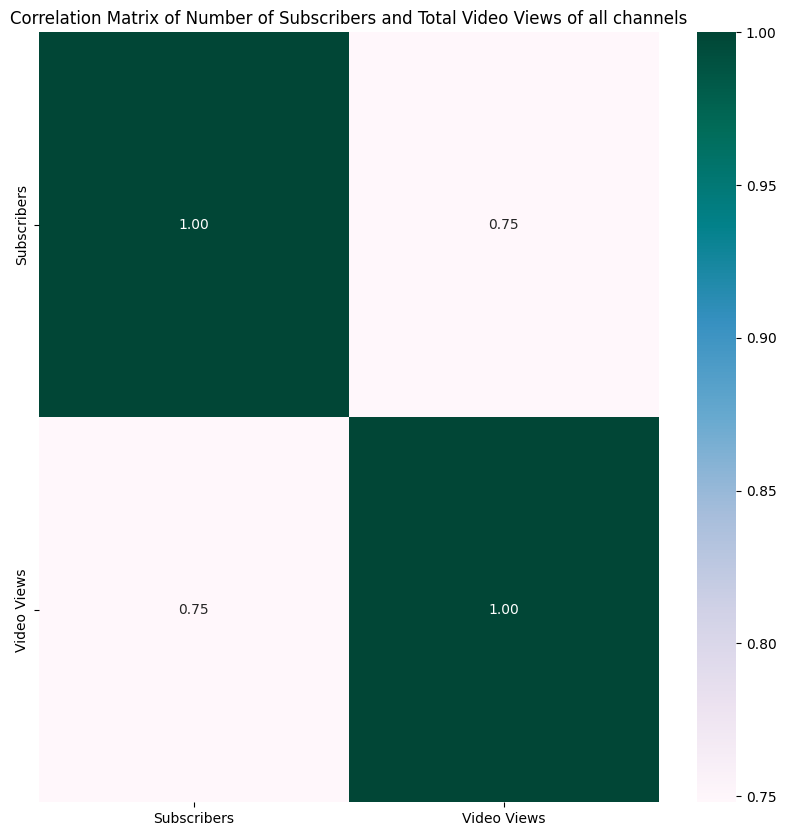

In [50]:
correlation_1 = df.loc[:, ["Subscribers", "Video Views"]]
corr_matrix = correlation_1.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr_matrix, annot = True, cmap = "PuBuGn", fmt = ".2f")
plt.title("Correlation Matrix of Number of Subscribers and Total Video Views of all channels")
plt.show()